## Análisis Descriptivo

In [1]:
# Librerías
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def obtener_datos_pokemons(inicio, fin=None):
    if fin is None:
        fin = inicio
    lista_pok = []

    for num in range(inicio, fin + 1):
        response = requests.get(url=f"https://pokeapi.co/api/v2/pokemon/{num}/")
        if response.status_code == 200:
            data = response.json()
            
            dic_pok = {
                'id': data['id'],
                'name': data['name'],
                'height': data['height'],
                'weight': data['weight']
            }
            
            for idx, type_info in enumerate(data['types']):
                dic_pok[f'type_{idx + 1}'] = type_info['type']['name']
            
            for stat_info in data['stats']:
                dic_pok[stat_info['stat']['name']] = stat_info['base_stat']
            
            lista_pok.append(dic_pok)

    return pd.DataFrame(lista_pok)

df_pokemon = obtener_datos_pokemons(1,151)


- lo guardamos en un tipo parquet

In [3]:
df_pokemon.to_parquet('poke.parquet', index=False)

In [4]:
df_pokemon.head()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,7,69,grass,poison,45,49,49,65,65,45
1,2,ivysaur,10,130,grass,poison,60,62,63,80,80,60
2,3,venusaur,20,1000,grass,poison,80,82,83,100,100,80
3,4,charmander,6,85,fire,NaN,39,52,43,60,50,65
4,5,charmeleon,11,190,fire,NaN,58,64,58,80,65,80


## Análisis de datos.

1. Definir el Problema
    - Objetivos
2. Recolección de Datos
    - Fuentes de datos
3. Análisis Descriptivo
    - Estadísticas Descriptivas
    - Visualizaciones de las variables (UniVariante)
4. Limpieza de los Datos
    - Calidad de los datos --> NaNs, outliers...
5. Análisis Exploratorio
    - Visualizaciones de variables (BiVariantes, MultiVariantes)
    - Correlaciones
6. Análisis Inferencial
    - Pruebas Estadísticas
7. ....
8. ....
9. Interpretación de los Resultados
    - Insight
    - Conclusiones
10. Toma de decisiones

# Análisis Descriptivo

- Realizar estadísticas descriptivas básicas para obtener una visión general de los datos.
- Identificar tipos de datos y reconocer patrones y anomalías evidentes.

Pasos para el análisis descriptivo:

1. Hacer una copia de df (dataframe)
2. Revisar el head y tail de df
3. Revisar la info
4. Revisar los missing
5. Hacer una tabla con los tipos de datos, clasificación de datos, cardinalidad, % missing, de cada variable
6. Revisar los outliers
7. Tipo de distribución 
8. Gráficos
    - Histogramas
    - Boxplot
    - Densidad 

# Librerías

In [5]:
# Análisis
import numpy as np
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# setup 
sns.set_palette('husl')

In [6]:
df=pd.read_parquet('poke.parquet')
df.head()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,7,69,grass,poison,45,49,49,65,65,45
1,2,ivysaur,10,130,grass,poison,60,62,63,80,80,60
2,3,venusaur,20,1000,grass,poison,80,82,83,100,100,80
3,4,charmander,6,85,fire,None,39,52,43,60,50,65
4,5,charmeleon,11,190,fire,None,58,64,58,80,65,80


# Primera exploracion

In [8]:
df.head()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,7,69,grass,poison,45,49,49,65,65,45
1,2,ivysaur,10,130,grass,poison,60,62,63,80,80,60
2,3,venusaur,20,1000,grass,poison,80,82,83,100,100,80
3,4,charmander,6,85,fire,None,39,52,43,60,50,65
4,5,charmeleon,11,190,fire,None,58,64,58,80,65,80


In [9]:
df.tail()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
146,147,dratini,18,33,dragon,None,41,64,45,50,50,50
147,148,dragonair,40,165,dragon,None,61,84,65,70,70,70
148,149,dragonite,22,2100,dragon,flying,91,134,95,100,100,80
149,150,mewtwo,20,1220,psychic,None,106,110,90,154,90,130
150,151,mew,4,40,psychic,None,100,100,100,100,100,100


In [10]:
df.shape

(151, 12)

- ( descripcion)
- El df consta de 151 filas y 12 columnas 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               151 non-null    int64 
 1   name             151 non-null    object
 2   height           151 non-null    int64 
 3   weight           151 non-null    int64 
 4   type_1           151 non-null    object
 5   type_2           67 non-null     object
 6   hp               151 non-null    int64 
 7   attack           151 non-null    int64 
 8   defense          151 non-null    int64 
 9   special-attack   151 non-null    int64 
 10  special-defense  151 non-null    int64 
 11  speed            151 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 14.3+ KB


In [12]:
df.dtypes

id                  int64
name               object
height              int64
weight              int64
type_1             object
type_2             object
hp                  int64
attack              int64
defense             int64
special-attack      int64
special-defense     int64
speed               int64
dtype: object

- se observa  que la mayoria de las variables son numericas a excepcion de name , type_,type_2

In [15]:
nulos=pd.DataFrame(df.isnull().sum(),columns=['Conteo de nulos'])
nulos['porcentaje']=nulos['Conteo de nulos']/len(df)*100
nulos


,Conteo de nulos,porcentaje
id,0,0.000000
name,0,0.000000
height,0,0.000000
weight,0,0.000000
type_1,0,0.000000
type_2,84,55.629139
hp,0,0.000000
attack,0,0.000000
defense,0,0.000000
special-attack,0,0.000000


- la variable type_2 es la unica que presenta nullos con 84 de ellos los que  representa el 55.63% de los datos. 
posibles tratamiebntos:
- Eliminar la columna  type_2.
- Eliminar las filas donde type_2  sea NaN.
- Imputar a la moda(es str)
- Feature Engineer de las sos columnas type_1 type_2 (concatenarlas)
Imputar a 'NO TIENE'

- nos quedaremos con la ultima opcion.

tabla

conclusion de la tabala

In [16]:
df.describe()

,id,height,weight,hp,attack,defense,special-attack,special-defense,speed
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,11.947020,459.516556,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
std,43.734045,9.626206,594.479883,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598
min,1.000000,2.000000,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
25%,38.500000,7.000000,99.000000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000
50%,76.000000,10.000000,300.000000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000
75%,113.500000,15.000000,562.500000,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000
max,151.000000,88.000000,4600.000000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000


In [24]:
col='hp'
q1=np.percentile(df[col],25)
q3=np.percentile(df[col],75)

IQR=q3-q1 # rango intercuatilico
lim_inf=(1.5*IQR) - q1   # limite inferior
lim_max=(1.5*IQR) + q3

In [26]:
print(lim_inf)
print(lim_max)

7.5
132.5


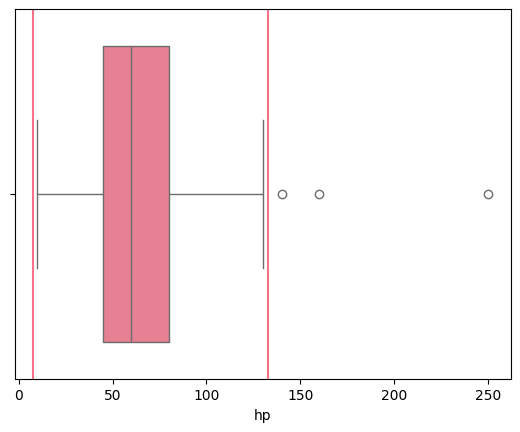

In [37]:
sns.boxplot(data=df, x='hp')
plt.axvline(x=7.5)
plt.axvline(x=132.5);


- notamos que no deberiamos fiarnos de los min y max de los bosplot , el min deberia ser 7.5 y parece ser el 10 

In [ ]:
# # foto
# print(df[col].describe())
# print('moda')




# plt.xticks(round=45)    # es para inclinar lo escrito 

In [44]:
df.select_dtypes(include='number')

,id,height,weight,hp,attack,defense,special-attack,special-defense,speed
0,1,7,69,45,49,49,65,65,45
1,2,10,130,60,62,63,80,80,60
2,3,20,1000,80,82,83,100,100,80
3,4,6,85,39,52,43,60,50,65
4,5,11,190,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
146,147,18,33,41,64,45,50,50,50
147,148,40,165,61,84,65,70,70,70
148,149,22,2100,91,134,95,100,100,80
149,150,20,1220,106,110,90,154,90,130


In [45]:
df.select_dtypes(include='number').columns

Index(['id', 'height', 'weight', 'hp', 'attack', 'defense', 'special-attack',
       'special-defense', 'speed'],
      dtype='object')